# <center>**FINAL PROJECT**</center>

In [ ]:
#Installing catch22

!pip install catch22

  Created wheel for catch22: filename=catch22-0.2.0-cp37-cp37m-linux_x86_64.whl size=91797 sha256=77220f5e6d8fac8c5841ac0f37b4a03ec55ffd61a285f36bb2e83dab52faf4f5
  Stored in directory: /root/.cache/pip/wheels/df/0b/f1/d6442e61fab7d543943fc539691cfffcd020e9275b8814183f
Successfully built catch22


In [ ]:
#for ignoring warnings 
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Standard Library Imports

import numpy as np
import pandas as pd

#Data encoding
from sklearn.preprocessing import LabelEncoder 

#Data partitioning
from sklearn.model_selection import train_test_split

#For visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import graphviz 

#For data scaling/normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

#catch22 for feature generation
from catch22 import catch22_all

#Feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import RFE

#Linear Regression
from sklearn.linear_model import LinearRegression

#k-Nearest Neighbours
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

#Decision Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

#Neural Network
from sklearn.neural_network import MLPRegressor

#Pipeline 
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
#from sklearn.model_selection import *

#Evaluation metric
from sklearn.metrics import *
from statsmodels.tools.eval_measures import mse, rmse

#Result tabulation
from prettytable import PrettyTable
from tabulate import tabulate

In [ ]:
#uploading dataset 

from google.colab import files
uploaded = files.upload()

Saving FINAL_DATA.csv to FINAL_DATA.csv


In [ ]:
#initializing data to dataframe

df_stock = pd.read_csv('FINAL_DATA.csv')

In [ ]:
df_stock.head()

,Date,Stock,Volume,Open,High,Low,Close/Last
0,8/11/21,NFLX,1673904,$517,$519.57,$509.77,$512.40
1,8/10/21,NFLX,1960544,$520,$520.79,$512.97,$515.84
2,8/9/21,NFLX,1367782,$521.15,$522.67,$517.99,$519.97
3,8/6/21,NFLX,1919798,$524,$526.84,$519.39,$520.55
4,8/5/21,NFLX,2556687,$517.13,$525.41,$514.02,$524.89


## **DATA EXPLORATION**

In [ ]:
df_stock.shape

(3024, 7)

In [ ]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024 entries, 0 to 3023
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        3024 non-null   object
 1   Stock       3024 non-null   object
 2   Volume      3024 non-null   int64 
 3   Open        3024 non-null   object
 4   High        3024 non-null   object
 5   Low         3024 non-null   object
 6   Close/Last  3024 non-null   object
dtypes: int64(1), object(6)
memory usage: 165.5+ KB


In [ ]:
#Checking missing values
df_stock.isna().sum()

Date          0
Stock         0
Volume        0
Open          0
High          0
Low           0
Close/Last    0
dtype: int64

## **DATA PREPROCESSING**

In [ ]:
#Removing $ from data
df_stock['Open'] = df_stock['Open'].str.replace('$','')
df_stock['High'] = df_stock['High'].str.replace('$','')
df_stock['Low'] = df_stock['Low'].str.replace('$','')
df_stock['Close/Last'] = df_stock['Close/Last'].str.replace('$','')

In [ ]:
#Parameter datatype conversion from STRING to FLOAT
df_stock['Open'] = pd.to_numeric(df_stock['Open'], downcast="float")
df_stock['High'] = pd.to_numeric(df_stock['High'], downcast="float")
df_stock['Low'] = pd.to_numeric(df_stock['Low'], downcast="float")
df_stock['Close/Last'] = pd.to_numeric(df_stock['Close/Last'], downcast="float")

#Converting 'Date' column values from STRING to DATATIME format
df_stock['Date'] = pd.to_datetime(df_stock['Date'])

In [ ]:
df_stock.head()

,Date,Stock,Volume,Open,High,Low,Close/Last
0,2021-08-11,NFLX,1673904,517.000000,519.570007,509.769989,512.400024
1,2021-08-10,NFLX,1960544,520.000000,520.789978,512.969971,515.840027
2,2021-08-09,NFLX,1367782,521.150024,522.669983,517.989990,519.969971
3,2021-08-06,NFLX,1919798,524.000000,526.840027,519.390015,520.549988
4,2021-08-05,NFLX,2556687,517.130005,525.409973,514.020020,524.890015


In [ ]:
#Displaying dataframe information
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024 entries, 0 to 3023
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        3024 non-null   datetime64[ns]
 1   Stock       3024 non-null   object        
 2   Volume      3024 non-null   int64         
 3   Open        3024 non-null   float32       
 4   High        3024 non-null   float32       
 5   Low         3024 non-null   float32       
 6   Close/Last  3024 non-null   float32       
dtypes: datetime64[ns](1), float32(4), int64(1), object(1)
memory usage: 118.2+ KB


## **DATA VISUALIZATIONS**

In [ ]:
#correlation matrix
corr = df_stock.iloc[:,0:7].corr()
corr.style.background_gradient(cmap='coolwarm')

,Volume,Open,High,Low,Close/Last
Volume,1.000000,-0.189322,-0.188509,-0.190230,-0.189190
Open,-0.189322,1.000000,0.999925,0.999913,0.999849
High,-0.188509,0.999925,1.000000,0.999885,0.999913
Low,-0.190230,0.999913,0.999885,1.000000,0.999932
Close/Last,-0.189190,0.999849,0.999913,0.999932,1.000000


##**(a)** Scatter Plot

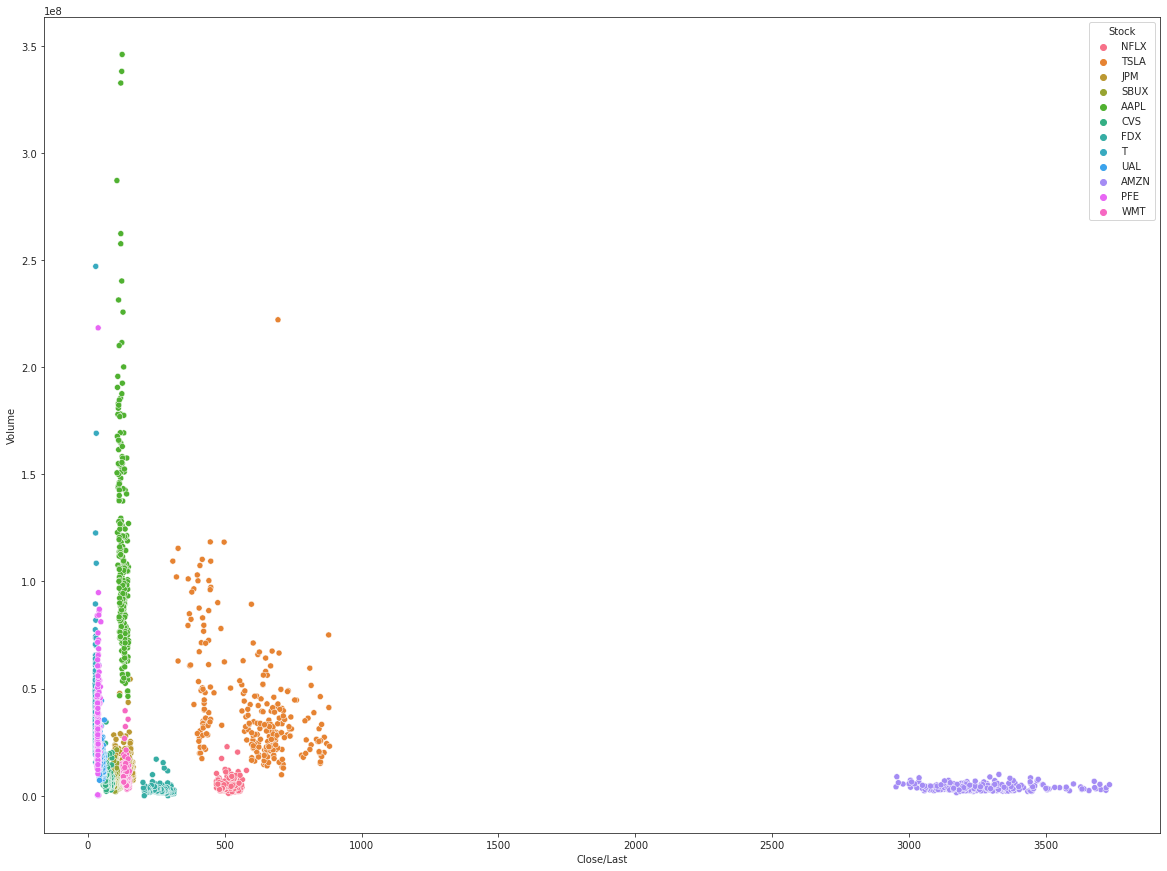

In [ ]:
#Scatter plot between Closing Price and Volume of 12 companies stocks
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
sns.scatterplot(data = df_stock, x="Close/Last", y="Volume", hue = 'Stock',ax=ax)

#We can observe from this scatter plot that volume and closing price are negatively correlated. 
#As closing price increases the volume of stocks decreases which make sense because if the price of a particular company's stock 
#increases the number of shares traded in the period decreses.

##**(b)** Time Series Chart

In [ ]:
#Extracting month from date
df_stock['month'] = pd. DatetimeIndex(df_stock['Date']). month

In [ ]:
#Dataframe for Sum of closing price for each company groupby month
df_stock_new=pd.DataFrame({'sum' : df_stock.groupby(['Stock','month'])['Close/Last'].sum()}).reset_index()
df_stock_new

,Stock,month,sum
0,AAPL,1,2527.699951
1,AAPL,2,2499.100098
2,AAPL,3,2803.040039
3,AAPL,4,2768.070068
4,AAPL,5,2535.679932
...,...,...,...
139,WMT,8,3033.570068
140,WMT,9,2917.050049
141,WMT,10,3137.090088
142,WMT,11,2962.000000


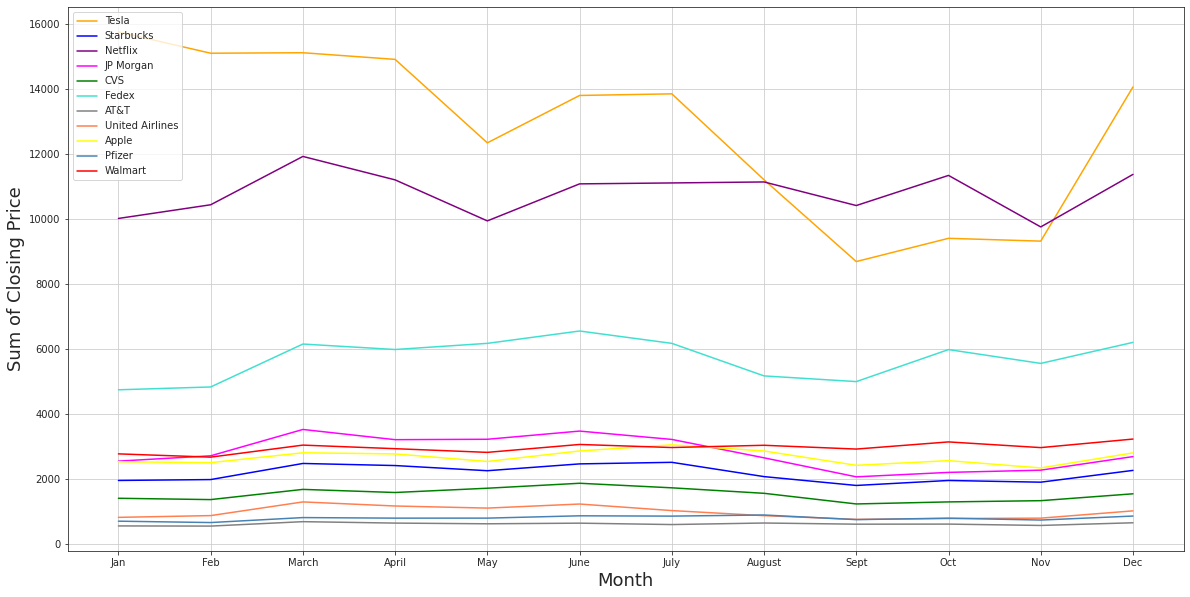

In [ ]:
#The time series chart shows the trend of 12 compannies for 1 year. 
#We can observe that tesla has highest closing price followed by netflix. 
#Companies like AT&T, Pfizer, United Airlines have consistent closing price for the whole year.

plt.figure(figsize = (20,10))
plt.grid(True)
plt.plot(range(df_stock_new.loc[df_stock_new['Stock']=='TSLA'].shape[0]),df_stock_new.loc[df_stock_new['Stock']=='TSLA',['sum']],color='orange')
plt.plot(range(df_stock_new.loc[df_stock_new['Stock']=='SBUX'].shape[0]),df_stock_new.loc[df_stock_new['Stock']=='SBUX',['sum']],color='blue')
plt.plot(range(df_stock_new.loc[df_stock_new['Stock']=='NFLX'].shape[0]),df_stock_new.loc[df_stock_new['Stock']=='NFLX',['sum']],color='purple')
plt.plot(range(df_stock_new.loc[df_stock_new['Stock']=='JPM'].shape[0]),df_stock_new.loc[df_stock_new['Stock']=='JPM',['sum']],color='magenta')
plt.plot(range(df_stock_new.loc[df_stock_new['Stock']=='CVS'].shape[0]),df_stock_new.loc[df_stock_new['Stock']=='CVS',['sum']],color='green')
plt.plot(range(df_stock_new.loc[df_stock_new['Stock']=='FDX'].shape[0]),df_stock_new.loc[df_stock_new['Stock']=='FDX',['sum']],color='turquoise')
plt.plot(range(df_stock_new.loc[df_stock_new['Stock']=='T'].shape[0]),df_stock_new.loc[df_stock_new['Stock']=='T',['sum']],color='gray')
plt.plot(range(df_stock_new.loc[df_stock_new['Stock']=='UAL'].shape[0]),df_stock_new.loc[df_stock_new['Stock']=='UAL',['sum']],color='coral')
plt.plot(range(df_stock_new.loc[df_stock_new['Stock']=='AAPL'].shape[0]),df_stock_new.loc[df_stock_new['Stock']=='AAPL',['sum']],color='yellow')
plt.plot(range(df_stock_new.loc[df_stock_new['Stock']=='PFE'].shape[0]),df_stock_new.loc[df_stock_new['Stock']=='PFE',['sum']], color='steelblue')
plt.plot(range(df_stock_new.loc[df_stock_new['Stock']=='WMT'].shape[0]),df_stock_new.loc[df_stock_new['Stock']=='WMT',['sum']],color='red')

x=[0,1,2,3,4,5,6,7,8,9,10,11]
labels=['Jan','Feb','March','April','May','June','July','August','Sept','Oct','Nov','Dec']
plt.xticks(x,labels)
plt.xlabel('Month',fontsize=18)
plt.ylabel('Sum of Closing Price',fontsize=18)
plt.gca().legend(('Tesla','Starbucks','Netflix','JP Morgan','CVS','Fedex','AT&T','United Airlines','Apple','Pfizer','Walmart'))
plt.show()

#**(c)** OHLC chart

OHLC (Open High Low Close) chart is a type of plot showing open, high, low, and close values. It depicts the fluctuation in price for a given stock in a time range. Since the data being used here is for the current day, the OHLC plot below has been created for the group of sectors. The tip of the lines in the plot represents high and low prices. The horizontal segments represent close and open prices. Increasing stock values are in green, decreasing are in red. There is a slider at the bottom of this plot to zoom in and visualize the price for each day. Placing the cursor on a single line on the chart gives us the OHLC values for that company.

In [ ]:
fig = go.Figure(data=go.Ohlc(x=df_stock['Date'],open=df_stock['Open'],high=df_stock['High'],low=df_stock['Low'],close=df_stock['Close/Last'],text=df_stock['Stock']))
fig.show()

# **Catch 22**

In [ ]:
#Data Encoding for Stock variable 
lb_make = LabelEncoder()
df_stock['Stock'] = lb_make.fit_transform(df_stock['Stock'])

In [ ]:
#Extracting 22 features from 'Close/Last' column i.e Response Variable
df_features = pd.DataFrame()
reponse=[]
feature_list=[]

for j in range (10,3022):
  df_close = catch22_all(df_stock.iloc[0:j,6])
  feature_list.append(df_close['values'])

In [ ]:
#Adding column names
df_features = pd.DataFrame(feature_list,columns=['Feature 1','Feature 2','Feature 3','Feature 4','Feature 5','Feature 6','Feature 7','Feature 8','Feature 9','Feature 10','Feature 11','Feature 12','Feature 13','Feature 14','Feature 15','Feature 16','Feature 17','Feature 18','Feature 19','Feature 20','Feature 21','Feature 22'])

In [ ]:
#Initializing empty lists for existing dataframe parameters
stock=[]
volume=[]
open=[]
high=[]
low=[]
close=[]

#Assigning values and converting into LIST data type
stock = list(df_stock['Stock'])
volume = list(df_stock['Volume'])
open = list(df_stock['Open'])
high = list(df_stock['High'])
low = list(df_stock['Low'])
close = list(df_stock['Close/Last'])

#Adding raw data values to new dataframe
#new dataframe includes old parameters and 22 features extracted from the response value
df_features['Stock']=stock[11:3023]
df_features['Volume']=volume[11:3023]
df_features['Open']=open[11:3023]
df_features['High']=high[11:3023]
df_features['Low']=low[11:3023]
df_features['Close']=close[11:3023]

#creating spare dataframe to be used in Neural Network
df_features1=df_features

In [ ]:
df_features.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12,Feature 13,Feature 14,Feature 15,Feature 16,Feature 17,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Stock,Volume,Open,High,Low,Close
0,-0.441955,0.178299,1,4,1.039721,-0.703257,1.0,5.0,0.062500,0,0.278536,1.0,1.0,-0.200000,0.400000,1.560003e-33,3.0,1.735126,0.0,0.0,1.178097,1.366450,5,2759037,518.080017,521.950012,512.049988,518.909973
1,0.188399,0.714404,1,4,0.906824,-0.505421,1.0,5.0,0.040000,0,0.286382,1.0,0.5,-0.181818,0.272727,0.000000e+00,3.0,1.886697,0.0,0.0,1.178097,1.361651,5,2254538,514.380005,521.130005,509.010010,516.489990
2,0.156692,0.703291,1,4,0.725336,-0.515675,1.0,5.0,0.040000,0,0.294783,1.0,0.5,-0.208333,0.166667,0.000000e+00,3.0,1.893788,0.0,0.0,1.178097,1.333393,5,3820478,512.159973,517.409973,504.660004,515.409973
3,0.179183,0.369175,1,2,0.689009,-0.559253,1.0,5.0,0.046296,3,0.100649,2.0,0.5,-0.230769,0.076923,5.925938e-35,3.0,2.022809,0.0,0.0,1.178097,1.314930,5,4328061,510.209991,513.679993,507.000000,511.769989
4,-0.171700,0.154971,1,2,0.687379,-0.568887,1.0,5.0,0.046296,3,0.107573,4.0,0.5,-0.285714,0.000000,5.502657e-35,3.0,1.844621,0.0,0.0,1.178097,1.309926,5,11906790,526.130005,530.989990,505.609985,513.630005


In [ ]:
df_features.shape

(3012, 28)

# 1. Linear Regression

In [ ]:
#data partitioning

X_train, X_test, y_train, y_test = train_test_split(
    df_features1.iloc[:,0:27], df_features1.iloc[:,27], test_size=0.3)

In [ ]:
#model
lreg=LinearRegression()
lreg.fit(X_train,y_train)
pred=lreg.predict(X_test)

In [ ]:
#result tabulation
t = PrettyTable(['Metric', 'Value']) 
t.add_row(['R-squared', r2_score(y_test,pred)]) #R-squared value
t.add_row(['RMSE', mean_squared_error(y_test, pred, squared=False)]) #Root Mean Squared Error
t.add_row(['MAE',mean_absolute_error(y_test,pred)]) #Mean Absolute Error
print(t)

+-----------+-------------------+
|   Metric  |       Value       |
+-----------+-------------------+
| R-squared | 0.999906663147768 |
|    RMSE   | 8.584406568993206 |
|    MAE    | 2.816913696017794 |
+-----------+-------------------+


# 2. k-Nearest Neighbours


---

*Common features have been used to train kNN and Decision Tree models

In [ ]:
#plotting correlation matrix to check for multicollinearity
corr = df_features.corr()
corr.style.background_gradient(cmap='coolwarm')

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12,Feature 13,Feature 14,Feature 15,Feature 16,Feature 17,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Stock,Volume,Open,High,Low,Close
Feature 1,1.000000,0.614781,-0.386532,-0.331308,-0.504051,0.050345,-0.172744,-0.109287,-0.536735,0.502013,-0.475170,0.089402,0.105870,0.499167,0.063386,-0.001618,0.161569,-0.212871,-0.019591,-0.335573,0.028774,0.018804,-0.047214,-0.261535,0.375360,0.374280,0.376511,0.375433
Feature 2,0.614781,1.000000,-0.443249,-0.385556,-0.594982,0.117857,-0.023664,-0.305130,-0.618953,0.440331,-0.622107,-0.068089,0.228952,0.578128,-0.124931,-0.157816,-0.061739,-0.033973,0.047510,-0.312997,0.183779,0.203496,0.006361,-0.185179,0.357097,0.356848,0.357446,0.357101
Feature 3,-0.386532,-0.443249,1.000000,0.877613,0.522020,-0.165057,-0.694077,0.823075,0.462210,0.031310,0.750262,0.579892,-0.382268,-0.763668,0.073668,0.444584,0.622939,-0.649164,0.104361,0.495511,-0.417337,-0.731611,-0.115789,0.165564,-0.371689,-0.372830,-0.371039,-0.372054
Feature 4,-0.331308,-0.385556,0.877613,1.000000,0.452808,-0.094411,-0.607243,0.806096,0.458234,-0.059782,0.681717,0.494779,-0.326920,-0.712767,0.089867,0.366160,0.540134,-0.549157,0.081714,0.498125,-0.338280,-0.623108,-0.374411,0.065379,-0.070033,-0.071247,-0.069029,-0.070231
Feature 5,-0.504051,-0.594982,0.522020,0.452808,1.000000,-0.202595,0.053569,0.349933,0.660086,-0.704548,0.908849,0.212368,-0.227057,-0.794398,0.502809,0.162652,0.199231,0.042681,-0.203505,-0.052575,-0.160904,-0.321528,-0.068587,0.191551,-0.552753,-0.552717,-0.552976,-0.552853
Feature 6,0.050345,0.117857,-0.165057,-0.094411,-0.202595,1.000000,0.082417,-0.090470,-0.070815,0.020286,-0.198828,-0.131434,0.192878,0.131948,-0.028506,-0.153692,-0.136638,0.111347,-0.034827,-0.073486,0.177823,0.172711,0.006168,-0.026302,0.251302,0.250999,0.251551,0.251245
Feature 7,-0.172744,-0.023664,-0.694077,-0.607243,0.053569,0.082417,1.000000,-0.813933,0.018869,-0.578224,-0.251927,-0.786360,0.387517,0.204145,0.055117,-0.574651,-0.835578,0.956906,-0.227329,-0.416493,0.516359,0.836236,0.069444,-0.028792,-0.063121,-0.061389,-0.064608,-0.062878
Feature 8,-0.109287,-0.305130,0.823075,0.806096,0.349933,-0.090470,-0.813933,1.000000,0.337308,0.167654,0.636324,0.686017,-0.395455,-0.606030,0.181407,0.493255,0.738721,-0.761068,0.156741,0.481952,-0.447700,-0.784528,-0.185596,0.072278,-0.046941,-0.048834,-0.045209,-0.047187
Feature 9,-0.536735,-0.618953,0.462210,0.458234,0.660086,-0.070815,0.018869,0.337308,1.000000,-0.448769,0.724884,0.138167,-0.196261,-0.588816,0.250186,0.137946,0.092790,0.033123,-0.302273,0.202908,-0.151316,-0.263074,-0.328086,0.229348,-0.281903,-0.282023,-0.281881,-0.281785
Feature 10,0.502013,0.440331,0.031310,-0.059782,-0.704548,0.020286,-0.578224,0.167654,-0.448769,1.000000,-0.473169,0.306433,-0.041705,0.438915,-0.363299,0.207504,0.334261,-0.577450,0.151923,0.195616,-0.174406,-0.257952,0.069094,-0.094955,0.351471,0.350678,0.352156,0.351344


In [ ]:
#Dropping features to remove Multicollinearity
df_features=df_features.drop(['Feature 3','Feature 11','Feature 8','Feature 12'], axis=1)

In [ ]:
#Standardizing the data
df_stock_scaled = df_features
scaler = StandardScaler()
features = ['Feature 1','Feature 2','Feature 4','Feature 5','Feature 6','Feature 7','Feature 9','Feature 10','Feature 13','Feature 14','Feature 15','Feature 16','Feature 17','Feature 18','Feature 19','Feature 20','Feature 21','Feature 22','Open', 'High', 'Low','Volume']
df_stock_scaled[features] = scaler.fit_transform(df_stock_scaled[features])
df_stock_scaled.head()

,Feature 1,Feature 2,Feature 4,Feature 5,Feature 6,Feature 7,Feature 9,Feature 10,Feature 13,Feature 14,Feature 15,Feature 16,Feature 17,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Stock,Volume,Open,High,Low,Close
0,-0.150698,2.342289,-1.47813,0.892555,-5.579645,2.696524,-0.125484,-0.965582,19.32017,-0.387955,0.418945,-14.215855,-5.525716,2.772694,-1.762202,-2.937515,15.471612,8.097969,5,-0.619817,0.082615,0.079947,0.083652,518.909973
1,1.688218,3.938159,-1.47813,0.450349,-4.051481,2.696524,-0.742470,-0.965582,9.48445,-0.358193,-0.061436,-14.215855,-5.525716,3.710172,-1.762202,-2.937515,15.471612,8.065878,5,-0.634264,0.078378,0.079018,0.080128,516.489990
2,1.595719,3.905078,-1.47813,-0.153541,-4.130693,2.696524,-0.742470,-0.965582,9.48445,-0.401596,-0.461754,-14.215855,-5.525716,3.754033,-1.762202,-2.937515,15.471612,7.876937,5,-0.589421,0.075836,0.074802,0.075085,515.409973
3,1.661331,2.910487,-1.48450,-0.274418,-4.467300,2.696524,-0.569816,-0.955812,9.48445,-0.438322,-0.800484,-14.215855,-5.525716,4.552036,-1.762202,-2.937515,15.471612,7.753485,5,-0.574885,0.073603,0.070575,0.077798,511.769989
4,0.637709,2.272846,-1.48450,-0.279843,-4.541716,2.696524,-0.569816,-0.955812,9.48445,-0.528263,-1.090824,-14.215855,-5.525716,3.449932,-1.762202,-2.937515,15.471612,7.720023,5,-0.357855,0.091833,0.090192,0.076186,513.630005


In [ ]:
# Split into training and validation set
X_train, X_test, y_train, y_test = train_test_split(
  df_stock_scaled.iloc[:,0:23], df_stock_scaled.iloc[:,23], test_size=0.3)

In [ ]:
#kNN using Grid Search
n = np.arange(1,21)
dist = np.array(['euclidean', 'manhattan'])
weight = np.array(['uniform', 'distance'])

#Predicttive performance for kNN method
results = pd.DataFrame(columns = ['#neighbors','distance', 'weight', 'rmse','R2 square'])
index = 0
for i in n:
  for j in dist:
    for k in weight:
      knn_model = neighbors.KNeighborsRegressor(n_neighbors=i, metric=j, weights=k)
      knn_model.fit(X_train, y_train)
      y_pred = knn_model.predict(X_test)
      rmse = mean_squared_error(y_test, y_pred, squared=False)
      r2=r2_score(y_test,y_pred)
      results.loc[index] = [i,j,k,rmse,r2]
      index +=1
print('Best performing model')      
print(tabulate(results[results['rmse']==results['rmse'].min()], headers = 'keys', tablefmt = 'psql'))
print('All results')
print(tabulate(results, headers = 'keys', tablefmt = 'psql'))

Best performing model
+----+--------------+------------+----------+---------+-------------+
|    |   #neighbors | distance   | weight   |    rmse |   R2 square |
|----+--------------+------------+----------+---------+-------------|
| 11 |            3 | manhattan  | distance | 15.8352 |    0.999655 |
+----+--------------+------------+----------+---------+-------------+
All results
+----+--------------+------------+----------+---------+-------------+
|    |   #neighbors | distance   | weight   |    rmse |   R2 square |
|----+--------------+------------+----------+---------+-------------|
|  0 |            1 | euclidean  | uniform  | 17.5302 |    0.999578 |
|  1 |            1 | euclidean  | distance | 17.5302 |    0.999578 |
|  2 |            1 | manhattan  | uniform  | 15.9652 |    0.99965  |
|  3 |            1 | manhattan  | distance | 15.9652 |    0.99965  |
|  4 |            2 | euclidean  | uniform  | 17.326  |    0.999587 |
|  5 |            2 | euclidean  | distance | 16.3157 | 

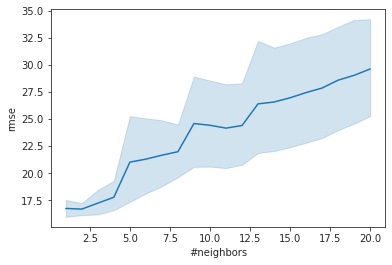

In [ ]:
#Line plot for k and rmse value.
#we can observe from this plot that rmse is minimum at k=2.
sns.lineplot(x = '#neighbors', y = 'rmse', data = results )

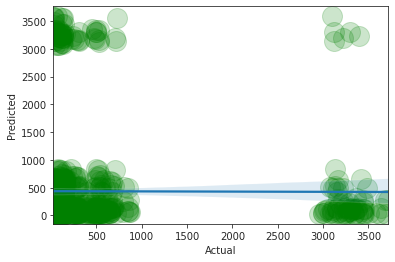

In [ ]:
#plot for actual and predicted.
new_feat= pd.DataFrame(columns = ['Actual', 'Predicted'])
new_feat['Actual']= y_test
new_feat['Predicted']= y_pred

sns.regplot('Actual', 'Predicted', data=new_feat,  scatter_kws={'color': 'green', 'alpha': 0.2, 's': 400})

# 3. Decision Tree : Random Forest

In [ ]:
# Split into training and validation set
X_train, X_test, y_train, y_test = train_test_split(
  df_features1.iloc[:,0:27], df_features1.iloc[:,27], test_size=0.2)

In [ ]:
#Performance of Decision tree
from sklearn.ensemble import RandomForestRegressor
ind = 1
crit = ['mae', 'mse']
df_results = pd.DataFrame(columns = ['depth', 'Puritymethod', 'Rmse','R2 Squared'])

for i in np.arange(1, 20):
  for j in crit:
    model = RandomForestRegressor(max_depth=i, criterion=j, n_estimators=10)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, pred, squared=False)
    r2_dt=r2_score(y_test,pred)
    df_results.loc[ind] = [i, j, rmse, r2_dt]
    ind+=1
print('Best performing model')      
print(tabulate(df_results[df_results['Rmse']==df_results['Rmse'].min()], headers = 'keys', tablefmt = 'psql'))
print('All results')
print(tabulate(df_results, headers = 'keys', tablefmt = 'psql'))

Best performing model
+----+---------+----------------+---------+--------------+
|    |   depth | Puritymethod   |    Rmse |   R2 Squared |
|----+---------+----------------+---------+--------------|
| 29 |      15 | mae            | 8.25106 |     0.999905 |
+----+---------+----------------+---------+--------------+
All results
+----+---------+----------------+-----------+--------------+
|    |   depth | Puritymethod   |      Rmse |   R2 Squared |
|----+---------+----------------+-----------+--------------|
|  1 |       1 | mae            | 206.336   |     0.940785 |
|  2 |       1 | mse            | 193.022   |     0.94818  |
|  3 |       2 | mae            |  82.104   |     0.990624 |
|  4 |       2 | mse            |  81.5665  |     0.990746 |
|  5 |       3 | mae            |  50.0613  |     0.996514 |
|  6 |       3 | mse            |  45.4062  |     0.997132 |
|  7 |       4 | mae            |  19.7721  |     0.999456 |
|  8 |       4 | mse            |  21.2069  |     0.999374 |


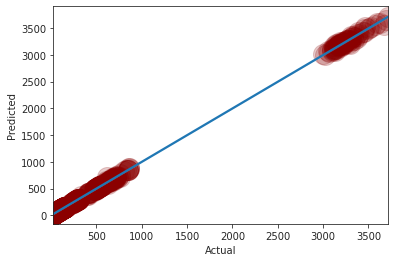

In [ ]:
new_features= pd.DataFrame(columns = ['Actual', 'Predicted'])
new_features['Actual']= y_test
new_features['Predicted']= pred

sns.regplot('Actual', 'Predicted', data=new_features,  scatter_kws={'color': 'darkred', 'alpha': 0.2, 's': 400})

# 4. Neural Network

In [ ]:
#plotting correlation matrix to check for multicollinearity
corr = df_features1.corr()
corr.style.background_gradient(cmap='coolwarm')

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12,Feature 13,Feature 14,Feature 15,Feature 16,Feature 17,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Stock,Volume,Open,High,Low,Close
Feature 1,1.000000,0.614781,-0.386532,-0.331308,-0.504051,0.050345,-0.172744,-0.109287,-0.536735,0.502013,-0.475170,0.089402,0.105870,0.499167,0.063386,-0.001618,0.161569,-0.212871,-0.019591,-0.335573,0.028774,0.018804,-0.047214,-0.261535,0.375360,0.374280,0.376511,0.375433
Feature 2,0.614781,1.000000,-0.443249,-0.385556,-0.594982,0.117857,-0.023664,-0.305130,-0.618953,0.440331,-0.622107,-0.068089,0.228952,0.578128,-0.124931,-0.157816,-0.061739,-0.033973,0.047510,-0.312997,0.183779,0.203496,0.006361,-0.185179,0.357097,0.356848,0.357446,0.357101
Feature 3,-0.386532,-0.443249,1.000000,0.877613,0.522020,-0.165057,-0.694077,0.823075,0.462210,0.031310,0.750262,0.579892,-0.382268,-0.763668,0.073668,0.444584,0.622939,-0.649164,0.104361,0.495511,-0.417337,-0.731611,-0.115789,0.165564,-0.371689,-0.372830,-0.371039,-0.372054
Feature 4,-0.331308,-0.385556,0.877613,1.000000,0.452808,-0.094411,-0.607243,0.806096,0.458234,-0.059782,0.681717,0.494779,-0.326920,-0.712767,0.089867,0.366160,0.540134,-0.549157,0.081714,0.498125,-0.338280,-0.623108,-0.374411,0.065379,-0.070033,-0.071247,-0.069029,-0.070231
Feature 5,-0.504051,-0.594982,0.522020,0.452808,1.000000,-0.202595,0.053569,0.349933,0.660086,-0.704548,0.908849,0.212368,-0.227057,-0.794398,0.502809,0.162652,0.199231,0.042681,-0.203505,-0.052575,-0.160904,-0.321528,-0.068587,0.191551,-0.552753,-0.552717,-0.552976,-0.552853
Feature 6,0.050345,0.117857,-0.165057,-0.094411,-0.202595,1.000000,0.082417,-0.090470,-0.070815,0.020286,-0.198828,-0.131434,0.192878,0.131948,-0.028506,-0.153692,-0.136638,0.111347,-0.034827,-0.073486,0.177823,0.172711,0.006168,-0.026302,0.251302,0.250999,0.251551,0.251245
Feature 7,-0.172744,-0.023664,-0.694077,-0.607243,0.053569,0.082417,1.000000,-0.813933,0.018869,-0.578224,-0.251927,-0.786360,0.387517,0.204145,0.055117,-0.574651,-0.835578,0.956906,-0.227329,-0.416493,0.516359,0.836236,0.069444,-0.028792,-0.063121,-0.061389,-0.064608,-0.062878
Feature 8,-0.109287,-0.305130,0.823075,0.806096,0.349933,-0.090470,-0.813933,1.000000,0.337308,0.167654,0.636324,0.686017,-0.395455,-0.606030,0.181407,0.493255,0.738721,-0.761068,0.156741,0.481952,-0.447700,-0.784528,-0.185596,0.072278,-0.046941,-0.048834,-0.045209,-0.047187
Feature 9,-0.536735,-0.618953,0.462210,0.458234,0.660086,-0.070815,0.018869,0.337308,1.000000,-0.448769,0.724884,0.138167,-0.196261,-0.588816,0.250186,0.137946,0.092790,0.033123,-0.302273,0.202908,-0.151316,-0.263074,-0.328086,0.229348,-0.281903,-0.282023,-0.281881,-0.281785
Feature 10,0.502013,0.440331,0.031310,-0.059782,-0.704548,0.020286,-0.578224,0.167654,-0.448769,1.000000,-0.473169,0.306433,-0.041705,0.438915,-0.363299,0.207504,0.334261,-0.577450,0.151923,0.195616,-0.174406,-0.257952,0.069094,-0.094955,0.351471,0.350678,0.352156,0.351344


In [ ]:
#Dropping unnecessary features
df_NN_stock = df_features1.drop(columns=['Feature 2','Feature 3','Feature 4','Feature 8','Feature 21','Feature 22'])

In [ ]:
df_NN_stock.shape

(3012, 22)

In [ ]:
#data partitioning
X_train, X_test, y_train, y_test = train_test_split(
    df_NN_stock.iloc[:,0:21], df_NN_stock.iloc[:,21], test_size=0.3)

In [ ]:
#Neural Network model with Hyperparameter Tuning
results = pd.DataFrame(columns=['Learning Rate', 'Transfer Function', 'Hidden_Layer','R-squared','RMSE','MAE'])
lr = [ 0.003, 0.01, 0.03, 1, 3, 10]
hidden_layer = [50, 100,150]
transfer_function = ['identity','logistic', 'tanh', 'relu']
index=0
for i in lr:
  for j in transfer_function:
    for k in hidden_layer:
      nn_model = MLPRegressor(learning_rate_init= i, activation=j, hidden_layer_sizes= k)
      nn_model.fit(X_train, y_train)
      n_pred = nn_model.predict(X_test)
      r2=r2_score(y_test,n_pred)
      mae=mean_absolute_error(y_test,n_pred)
      rmse = mean_squared_error(y_test,n_pred,squared=False)
      results.loc[index] = [i, j, k, r2,rmse,mae]
      index+=1


In [ ]:
#Displaying result with best set of hyperparameters
results[results['R-squared']==results['R-squared'].max()]

,Learning Rate,Transfer Function,Hidden_Layer,R-squared,RMSE,MAE
22,0.01,relu,100,0.999811,12.108047,6.949956


# Model Performance

In [ ]:
models = ['Linear Regression','k Nearest Neighbours','Random Forest','Neural Network']
rmse = [ 8.584406 , 15.835200 , 8.251061 , 12.108047 ]
r2_list = [ 0.999906 , 0.999655 , 0.999905 , 0.999811 ]

res=pd.DataFrame()
res['MODELS']=models
res['RMSE']=rmse
res['R^2']=r2_list

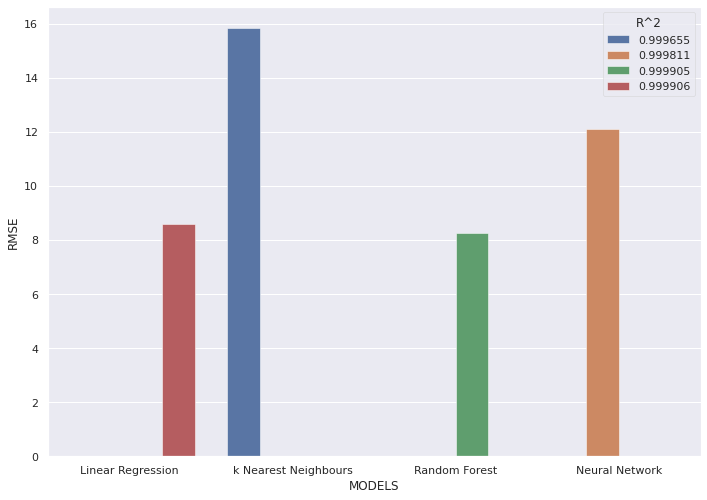

In [ ]:

sns.set_context(rc = {'patch.linewidth': 0.5})
sns.barplot(x = 'MODELS',
            y = 'RMSE',
            hue = 'R^2',
            data = res,
            estimator = np.median,
            ci = 0)

# **CONCLUSION**

## The graph above compares model performances based upon their **rmse** and **r squared** values. It can observed that Random Forest is the best performing model for Stock Market Price Prediction. 
